Single Particle in a Double Well
=================================


The Hamiltonian is 

\begin{equation}
H = p^2 + V_0\left(-2x^2 + x^4\right)
\end{equation}

### Exact Dynamics 

First, we compute the exact dynamics using QuTiP. The momentum and position operators are written as

\begin{align*}
x &= \frac{1}{2}\left(a^\dagger+a\right)\\
p &= \frac{i}{2}\left(a^\dagger-a\right)
\end{align*}

where $a$ and $a^\dagger$ are the harmonic oscillator creation and annihilation operators, respectively.This allows us to obtain matrix representations of $x,p$, and therefore, $H$, using existing routines in QuTiP.

For the initial condition, we choose a gaussian localized at one of the double wells (by default, the left one, with centroid at $x=-1$). We can set this in the exact dynamics problem by displacing a Harmonic oscillator from a potential minimum at $x=0$ to one at $x=-1$ and obtaining the ground state therein. Thus, the initial condition will be the ground state of the Hamiltonian

\begin{align*}
H_{in} &= p^2 + \left(x+1\right)^2
\end{align*}

### Generalized Truncated Winger Dynamics

Now, we obtain the Generalized Truncated Wigner Dynamics, adding higher-order corrections in a controlled BBGKY heirarchy. The Heisenberg dynamics is

\begin{align*}
\frac{d}{dt} x &= i \left[x, H\right] = p\\
\frac{d}{dt} p &= i \left[p, H\right]  = 4V_0\left(x - x^3\right)\\
\frac{d}{dt} x^2 &= i \left[x^2, H\right]  = 2i-3xp\\
\frac{d}{dt} p^2 &= i \left[p^2, H\right]  = 8V_0x\left(x^2-1\right)p+4iV_0\left(1-3x^2\right)\\
\frac{d}{dt} \left(xp\right) &= i \left[xp, H\right]  = 4V_0x^2\left(x-1\right)-2p^2\\
\end{align*}

Let us now take Weyl symbols on both sides of these equations. First,we define weyls symbols $x \equiv (x)_W, p \equiv (p)_W$. Then, we define connected variables
\begin{align*}
C_{xx} &\equiv \left(x^2\right)_W - \left(x\right)^2_W\\
C_{pp} &\equiv \left(p^2\right)_W - \left(p\right)^2_W\\
C_{xp} &\equiv \left(xp\right)_W - \left(x\right)_W\left(p\right)_W\\
C^{ab}_{xxx} &\equiv \left(x^3\right)_W - \bigg\{a \left(x\right)^3_W + b\left(x\right)^2_W\left(x\right)_W \bigg\}\\
C^{\overline{abc}}_{xxxp} &\equiv \left(x^3p\right)_W-\bigg\{\bar{a}\left(x^3\right)_W\left(p\right)_W + \bar{b}\left(x^2\right)_W\left(x\right)_W + \bar{c}\left(x^2\right)_W\left(xp\right)_W \bigg\}\\
\end{align*}

For optimal values of $a,b,\bar{a}, \bar{b},\bar{c}$, we shall now neglect the last two connected variables and rewrite the truncated Heisenberg dynamics with respect to the remaining ones, as well as $x,p$. This generates a truncated BBGKY heirarchy whose dynamics we shall simulate as our approximation. Thus, we finally obtain


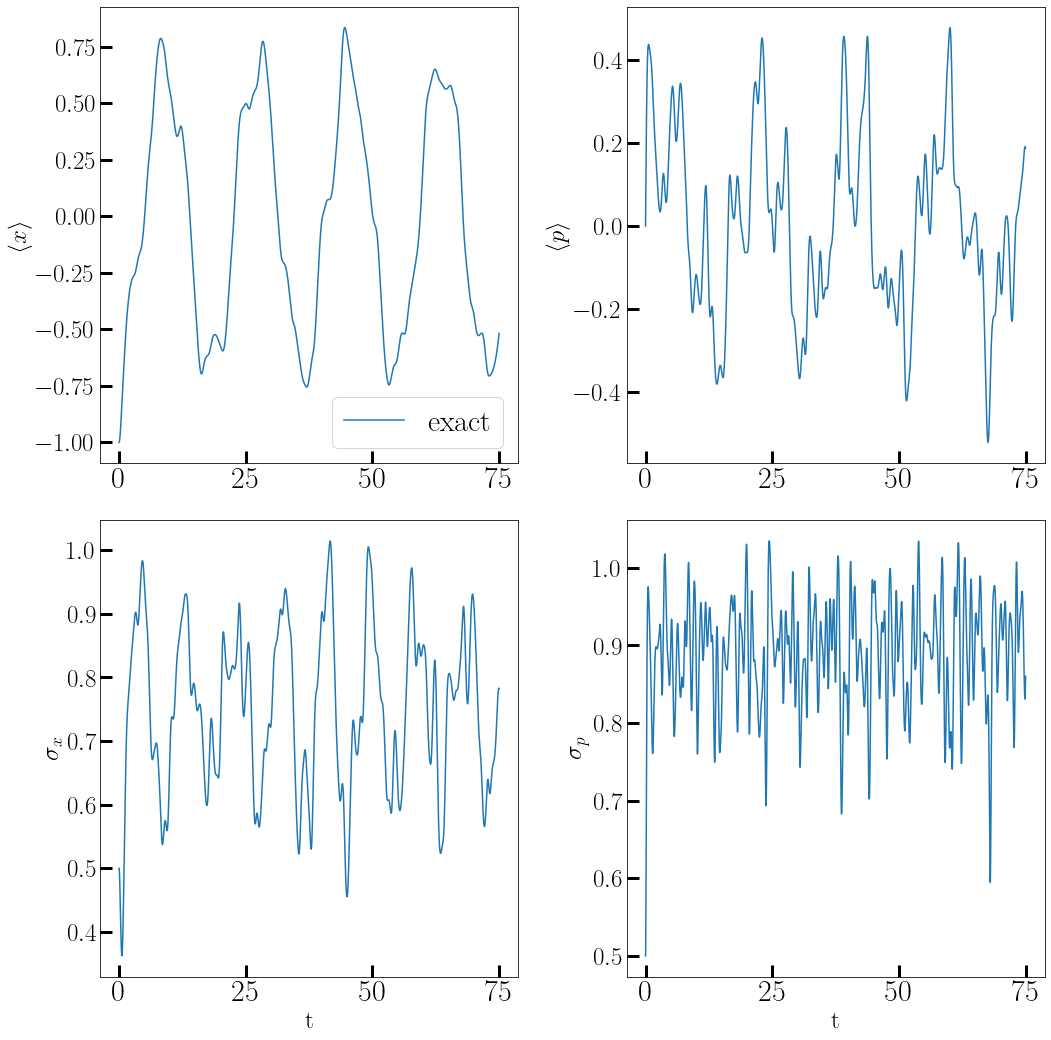

In [35]:
# Copyright 2021 Analabha Roy (daneel@utexas.edu):
# Released under the GPL license @ https://opensource.org/licenses/MIT
import numpy as np
import matplotlib.pyplot as plt

import qutip

# Define paramters
N = 100  # number of basis states to consider
v = 1.0
a = qutip.destroy(N)
x = 0.5 * (a.dag() + a)
p = 0.5 * (1j) * (a.dag()-a)

#Initial state is SHM ground state localized at x=-1
e, psi0 = (p**2 + (x+1)**2).groundstate()
times = np.linspace(0,75,5000)
result = qutip.sesolve(p**2 + v * (-2 * x**2 + x**4), psi0, times,\
                       [x, p, x**2, p**2])

xav, pav, xsqav, psqav = result.expect

plt.rc('text', usetex=True)
plt.rc('font', size=25)
plt.rc('font', family='serif')
fig, axs = plt.subplots(2, 2, figsize=(15,15))

axs[0, 0].plot(times, xav, label="exact")
axs[0, 0].set_ylabel(r'$\langle x \rangle$')
axs[0, 0].legend()

axs[0, 1].plot(times, pav)
axs[0, 1].set_ylabel(r'$\langle p \rangle$')

for ax in axs[1,:]:
    ax.set_xlabel("t")
axs[1, 0].plot(times, np.sqrt(xsqav - (xav)**2))
axs[1, 0].set_ylabel(r'$\sigma_x$')

axs[1, 1].plot(times, np.sqrt(psqav - (pav)**2))
axs[1, 1].set_ylabel(r'$\sigma_p$')

plt.show()